## Enviroment to be Used is my-rdkit-env
## same in the terminal as well

* **conda install -c conda-forge rdkit**

* **https://www.youtube.com/watch?v=VXFFHHoE1wk&ab_channel=DataProfessor**

# Cheminformatics in Python: Predicting Solubility of Molecules : 

* **In this Jupyter notebook, we will dive into the world of Cheminformatics which lies at the interface of Informatics and Chemistry. We will be reproducing a research article (by John S. Delaney$^1$) by applying Linear Regression to predict the solubility of molecules (i.e. solubility of drugs is an important physicochemical property in Drug discovery, design and development).**

## 2.0 Downloading the dataset : 

In [14]:
! wget https://raw.githubusercontent.com/dataprofessor/data/master/delaney.csv

--2020-09-16 04:00:04--  https://raw.githubusercontent.com/dataprofessor/data/master/delaney.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.152.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.152.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58889 (58K) [text/plain]
Saving to: 'delaney.csv'

     0K .......... .......... .......... .......... .......... 86%  968K 0s
    50K .......                                               100% 6.50M=0.05s

2020-09-16 04:00:05 (1.06 MB/s) - 'delaney.csv' saved [58889/58889]



In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_colwidth", 200)

## 2.1 Reading the dataset : 

In [3]:
df = pd.read_csv('C:\\Users\\Raj_jhumpa\\Downloads\\My Projects\\Machine Learning\\Datasets\delaney.csv')
df.head()
df.shape

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl


(1144, 4)

## 2.2 Examining the SMILES data : 

* **Chemical structures are encoded by a string of text known as SMILES which is an acronym for Simplified Molecular-Input Line-Entry System**

In [4]:
df.SMILES

0                                    ClCC(Cl)(Cl)Cl
1                                      CC(Cl)(Cl)Cl
2                                    ClC(Cl)C(Cl)Cl
3                                        ClCC(Cl)Cl
4                               FC(F)(Cl)C(F)(Cl)Cl
                           ...                     
1139                   CNC(=O)C(C)SCCSP(=O)(OC)(OC)
1140          CC1(OC(=O)N(C1=O)c2cc(Cl)cc(Cl)c2)C=C
1141         CC(=O)CC(c1ccccc1)c3c(O)c2ccccc2oc3=O 
1142    Cc1cccc(C)c1NC(=O)c2cc(c(Cl)cc2O)S(N)(=O)=O
1143                         CNC(=O)Oc1cc(C)cc(C)c1
Name: SMILES, Length: 1144, dtype: object

In [5]:
# The first element from the SMILES column of the sol dataframe.

df.SMILES[0]

'ClCC(Cl)(Cl)Cl'

## 2.3. Convert a molecule from the SMILES string to an rdkit object

* **The below is an example of how the rdkit transforms the smile data.**

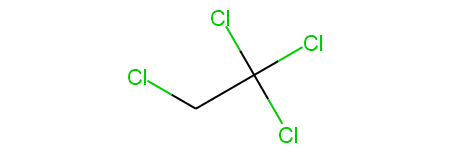

In [6]:
Chem.MolFromSmiles(df.SMILES[0])

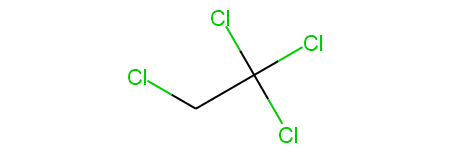

In [7]:
Chem.MolFromSmiles('ClCC(Cl)(Cl)Cl')

In [8]:
# To find out the number of atoms : 

m = Chem.MolFromSmiles('ClCC(Cl)(Cl)Cl')
m.GetNumAtoms()

6

# 3.0 Calculate molecular descriptors in rdkit : 

## 3.1. Convert list of molecules to rdkit object : 

In [9]:
mol_list = []

for elements in df.SMILES:

    mol = Chem.MolFromSmiles(elements)
    mol_list.append(mol)

In [10]:
len(mol_list)
print('The first 5 compounds in the list : ')
mol_list[:5]

1144

The first 5 compounds in the list : 


## 3.2. Calculate molecular descriptors

* **To predict `LogS` (log of the aqueous solubility), the study by Delaney makes use of 4 molecular descriptors:**

    * **1. `cLogP` (Octanol-water partition coefficient) : Which is the `ratio between solubility of molecule in Octanol and water`.**
    * **2. `MW` (Molecular weight) : summation of individual atomic weights.**
    * **3.`RB` (Number of rotatable bonds). `Note : Double Bonds cannot be rotated.`**
    * **4. `AP` (Aromatic proportion = number of aromatic atoms / total number of heavy atoms)**

* **rdkit can compute the first 3 descriptors but not the last one i.e `AP` which we will have to compute manually.**

In [11]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def generate(smiles, verbose=False):

    # Baisically creating a mol list as we done earlier : 

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    # Calculating the logP,MW & AP

    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_MolWt = Descriptors.MolWt(mol)
        desc_NumRotatableBonds = Descriptors.NumRotatableBonds(mol)

        # converting all the converted values into numpy array
           
        row = np.array([desc_MolLogP,
                        desc_MolWt,
                        desc_NumRotatableBonds])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MolLogP","MolWt","NumRotatableBonds"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [12]:
df_new = generate(df.SMILES)
df_new.head()

,MolLogP,MolWt,NumRotatableBonds
0,2.5954,167.850,0.0
1,2.3765,133.405,0.0
2,2.5938,167.850,1.0
3,2.0289,133.405,1.0
4,2.9189,187.375,1.0


## 3.3 Aromatic proportion : 

### 3.3.1 Calculating the Number of aromatic atoms : 

In [13]:
# Computing Aromatic Atoms for a single molecule : 

# Step 1 : convert the SMILES into rdkit molecular object
m = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')

# Step 2 : For the molecular object we retrive all the atoms from the molecule 
# And for each atom we will determine if each atom is aromatic or not 
# We will get boolean  values where True = Aromatic and vice versa
# Next we will count the no of true and we will get the number of Armatic Atoms


aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
aromatic_atoms[:5]

[False, False, True, True, True]

In [14]:
# Defining the function to calculate the number of aromatic atoms in all the molecules : 

def AromaticAtoms(m):
    aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
    aromatic_atoms_count = []

    for i in aromatic_atoms:
        if i== True:
            aromatic_atoms_count.append(1)
    sum_aromatic_atoms_count = sum(aromatic_atoms_count)
    return sum_aromatic_atoms_count

In [15]:
# Computing no of aromatic molecules in the single molecule m : 

AromaticAtoms(m)

# Cumputing the aromatic molecules for the entire mol_list we had created earlier : 

desc_AromaticAtoms = [AromaticAtoms(elements) for elements in mol_list]
desc_AromaticAtoms[10:17]


19

[6, 6, 6, 6, 6, 6, 6]

### 3.3.2 Calculating the number of heavy atoms in a similar way as above : 

* **The function to calculate the number of heavy atoms is already present.**

In [16]:
# Computing for a single molecule : 

m = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
Descriptors.HeavyAtomCount(m)

34

In [17]:
# Computing heavy molecules for the entire dataset : 

desc_HeavyAtomCount = [Descriptors.HeavyAtomCount(elements) for elements in mol_list]
desc_HeavyAtomCount[:7]

[6, 5, 6, 5, 8, 4, 4]

### 3.3.3 Finally Calculating the Aromatic Proportion (AP): 

* **`AP = Aromatic_Atoms / Heavy_Atoms`**

In [18]:
# Calculating AP for a single molecule : 


m = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')

AromaticAtoms(m)/Descriptors.HeavyAtomCount(m)

0.5588235294117647

In [19]:
# Computing AP for the entire dataset : 

desc_AromaticProportion = [AromaticAtoms(ele)/Descriptors.HeavyAtomCount(ele) for ele in mol_list]
desc_AromaticProportion[10:18]

[0.6,
 0.6666666666666666,
 0.6666666666666666,
 0.6,
 0.6,
 0.6,
 0.6666666666666666,
 0.6666666666666666]

In [20]:
# tranformaing the above list of AP into a dataframe :

df_desc_AromaticProportion = pd.DataFrame(desc_AromaticProportion, columns= ['AromaticProportion'])
df_desc_AromaticProportion.head()

,AromaticProportion
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [21]:
# Mergin the two dataframes (df_new and the df_desc_AromaticProportion) to get the completed dataset of descriptors : 

X = pd.concat([df_new, df_desc_AromaticProportion], axis = 1)
X.head()


,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.5954,167.850,0.0,0.0
1,2.3765,133.405,0.0,0.0
2,2.5938,167.850,1.0,0.0
3,2.0289,133.405,1.0,0.0
4,2.9189,187.375,1.0,0.0


* **This is the dataframe we will be training out model on.**

In [22]:
# our predictor willl be sencod column 
# i.e measured log(solubility:mol/L) column
df.head(2)

,Compound ID,measured log(solubility:mol/L),ESOL predicted log(solubility:mol/L),SMILES
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl


In [23]:
y = df.iloc[:,1]
y.head()

0   -2.18
1   -2.00
2   -1.74
3   -1.48
4   -3.04
Name: measured log(solubility:mol/L), dtype: float64

In [34]:
# combining all into 1 dataframe for later use as dataset to use with pycaret : 

# df_combined = pd.concat([X,y],axis = 1)
# df_combined.head()

# df_combined.rename(columns = {'measured log(solubility:mol/L)' : 'logS'}, inplace = True)
# df_combined.head(2)

# df_combined.to_csv('Delaney_with_descriptors_2.csv', index = False)

# 4.0 Model Building : 

In [76]:
# Splitting the data into train test : 

from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 )
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(915, 4)

(915,)

(229, 4)

(229,)

## 4.1 Linear Regression Model : 

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### 4.1.1 Predicting on train data : 

In [91]:
y_pred_train = lm.predict(X_train)
print('Coefficients:', lm.coef_)
print('Intercept:', lm.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_train, y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_train, y_pred_train))

Coefficients: [-0.73862892 -0.00670574  0.00860032 -0.41799487]
Intercept: 0.2590219877618791
Mean squared error (MSE): 1.04
Coefficient of determination (R^2): 0.77


### 4.1.2 Predicting on test data : 

In [92]:
y_pred_test = lm.predict(X_test)
print('Coefficients:', lm.coef_)
print('Intercept:', lm.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(y_test, y_pred_test))
print('Coefficient of determination (R^2): %.2f'    #Pearson Co-relation coefficient
      % r2_score(y_test, y_pred_test))

Coefficients: [-0.73862892 -0.00670574  0.00860032 -0.41799487]
Intercept: 0.2590219877618791
Mean squared error (MSE): 0.90
Coefficient of determination (R^2): 0.77


# 5.1 Scatter plot of experimental vs. predicted LogS : 

### Vertical plot : 

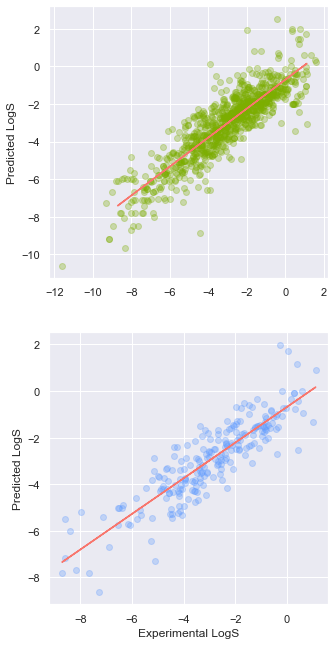

In [96]:
plt.figure(figsize=(5,11))

# 2 row, 1 column, plot 1
plt.subplot(2, 1, 1)
plt.scatter(x=y_train, y=y_pred_train, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(y_train, y_pred_train, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"#F8766D")

plt.ylabel('Predicted LogS')


# 2 row, 1 column, plot 2
plt.subplot(2, 1, 2)
plt.scatter(x=y_test, y=y_pred_test, c="#619CFF", alpha=0.3)

z = np.polyfit(y_test, y_pred_test, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"#F8766D")

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')

# plt.savefig('plot_vertical_logS.png')
# plt.savefig('plot_vertical_logS.pdf')
plt.show();

### Horizontal Plot : 

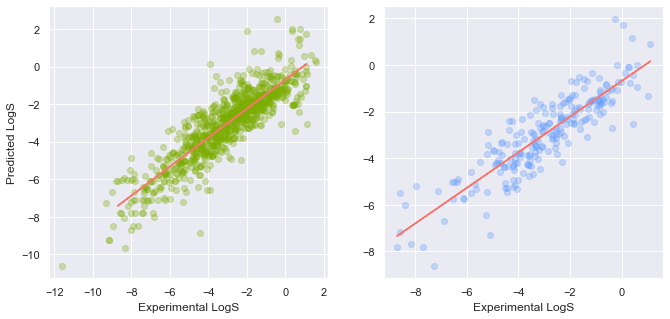

In [97]:
plt.figure(figsize=(11,5))

# 1 row, 2 column, plot 1
plt.subplot(1, 2, 1)
plt.scatter(x=y_train, y=y_pred_train, c="#7CAE00", alpha=0.3)

z = np.polyfit(y_train, y_pred_train, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"#F8766D")

plt.ylabel('Predicted LogS')
plt.xlabel('Experimental LogS')

# 1 row, 2 column, plot 2
plt.subplot(1, 2, 2)
plt.scatter(x=y_test, y=y_pred_test, c="#619CFF", alpha=0.3)

z = np.polyfit(y_test, y_pred_test, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"#F8766D")

plt.xlabel('Experimental LogS')

# plt.savefig('plot_horizontal_logS.png')
# plt.savefig('plot_horizontal_logS.pdf')
plt.show();